<a href="https://colab.research.google.com/github/JJang-likit/GoingDeeper_Aiffel/blob/main/GoingDeeper_Class_Activation_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoingDeeper / Class Activation Map 살펴보기

- 딥러닝 모델을 기반으로 이미지를 분류, 탐지하는 여러 모델들을 보면 이미지 모델의 입력에 맞게 전처리를 해주고 모델에 통과시킨 뒤 결과를 얻는 과정들이었다.
- 모델들이 잘 작동하는 것을 확인할 수 있지만 그 모델들이 어떤 추론 근거로 결과를 얻어내는지는 알 수 없었다.
- 우리는 이런 모델들을 블랙박스(Black Box) 모델이라고 한다.
- 모델이 추론해낸 결과들에 대한 신뢰성에 대한 답을 찾는 과정을 XAI(Explainable Artificial Intelligence, 설명 가능한 인공지능)이라고 한다.

## Explainable AI

- 많은 AI 모델들이 다양한 분야에 적용되서 좋은 성과를 내고 있지만 단순히 모델의 가중치를 최적화하는 과정만을 믿고 모델이 올바르게 동작한다고 넘겨짚기는 어렵다.
- 모델이 잘못된 답변을 준다면 어떻게 개선할 수 있을지, 잘 동작한다면 왜 이런 선택을 했는지 알고자 하는 것을 XAI(explainable AI)라고 한다.

## CAM : Class Activation Map

- 이미지 분류 분야에서 CAM(Class Activation Map)은 "모델이 어떤 곳을 보고 어떤 클래스임을 짐작하고 있는지" 확인할 수 있는 지도이다.
- CAM에서는 GAP(Global Average Pooling) 기법을 사용한다.

### GAP이란?
- 분류 모델의 마지막 뿌분에서 사용되는 fully connected layer 대신 GAP를 사용하는 방식을 채택한다.(Network in Network 논문에서 제안됨)
- GAP는 매 채널별로 average pooling을 채널의 값 전체에 global하게 적용한다.
- GAP 연산을 하고 그 연산 결과에 소프트맥스 활성화 함수를 적용한다.
- 논문에서는 이렇게 하면 특성 맵의 각 채널이 클래스별 신뢰도를 나타내게 되어 해석이 쉽고 fully connected layer와 달리 최적화할 파라미터가 존재하지 않기 때문에 과적합을 방지할 수 있다고 설명한다.

### CAM
- CAM은 이름에서 알 수 있듯이 클래스가 활성화되는 지도이다.
- 일반적인 CNN은 커널 윈도우에 따라서 특성을 추출하므로 CNN 레이어를 거친 특성 맵에도 입력값의 위치정보가 유지된다.
- 그래서 특성 맵의 정보를 이미지 컴출(detection)이나 세그멘테이션(Segmentation) 등의 문제를 푸는 데 이용하기도 한다.
- CAM을 얻기 위해서는 CNN 레이어를 거쳐 뽑아낸 특성 맵에 대해서 GAP를 적용한다.
- 그리고 소프트맥스 레이어를 적용한다.
- CNN을 거친 특성맵에서 각 클래스에 대한 정보는 결과값의 여러 채널에 나타난다.
- GAP를 통해 각 채널별 정보를 요약하면 소프트맥스 레이어는 이 정보를 보고 각 클래스에 대한 개별 채널의 중요도를 결정한다.
- 이렇게 클래스별로 소프트맥스 레이어를 통해 각 채널의 가중합을 구하면 각 클래스가 활성화 맵의 어떤 부분을 주로 활성화시키는지 확인할 수 있다.

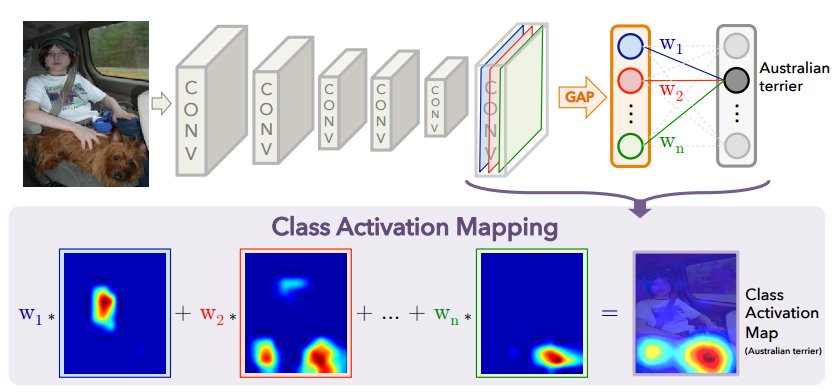

### Grad-CAM
- Grad-CAM은 CAM의 모델 구조가 제한되는 문제를 해결하고 다양한 모델의 구조를 해석할 수 있는 방법을 제안한다.
- Grad-CAM을 사용하면 CNN 기반의 네트워크는 굳이 모델 구조를 변경할 필요가 없으며, 분류 문제 외의 다른 테스크들에 유연하게 대처할 수 있다.

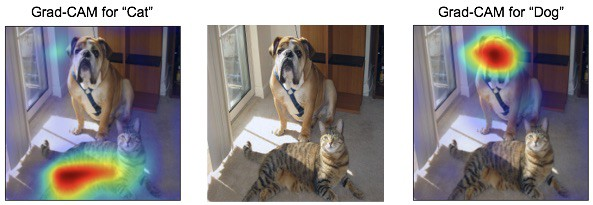

- Grad-CAM을 이용하면 높은 분별력을 가지는 것을 확인할 수 있다.
- Grad-CAM은 그래디언트(gradient)를 사용해서 해당 클래스를 활성화할 때, 레이어의 특서어 맵에서 어떤 채널이 중요하게 작용하는지 알 수 있다.
- Grad-CAM은 활성화함수로 ReLU를 사용하는데 ReLU를 사용함으로써 불필요한 음의 값을 줄이고 활성화된 영역을 확인할 수 있다.

## 약지도학습(weakly supervised learning)
- 직접적으로 정답 위치 정보를 주지 않아도 간접적인 정보를 활용하여 학습하고 원하는 정보를 얻어낼 수 있도록 모델을 학습하는 방식을 약지도학습이라고 한다.
- CAM, Grad-CAM, ACoL은 약지도학습 기법을 사용해서 물체를 검출할 수 있다.
- 약지도학습은 대표적으로 3가지로 나뉜다.
- incomplete supervision : 학습 데이터 중 일부에만 라벨이 달린 경우 / 일반적으로 말하는 준지도학습과 같은 경우임
- inexact supervision : 학습 데이터의 라벨이 충분히 정확하게 달려있지 않은 경우
- inaccurate supervision : 학습 데이터에 Noise가 있는 경우(라벨이 잘못 달린 경우)

### ACoL

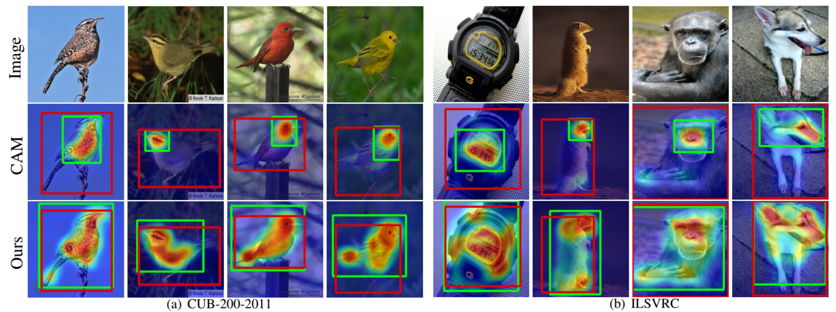

- CAM / Grad-CAM 방식은 한가지 문제점이 있는데 특징이 주로 나타내는 위치에 중점적으로 활성화된다는 것이다.
- 물체 검출은 새의 부리나 동물의 눈, 시계의 숫자와 같이 부분적 특성이 아닌 물체의 전체적인 형태와 윤곽등을 정확하게 구분해 내는 것이 중요하다.
- ACoL은 브랜치를 두가지로 두어 너무 높은 점수를 지워줌으로써 주변의 특성 또한 반영되도록 했다.
- 위 그림을 통해서 CAM에서 활성화되는 부분과 다르게 ACoL은 물체의 전반적인 영역으로 CAM이 활성화되는 효과를 확인할 수 있다.